# exampleGeometricModel

This code demostrates a few examples of what the geometricmodel package does. We show how to create, sample, fit, and visualize implemented various models.

In [1]:
import numpy as np
import geometricmodel as gm    # main package

### Example: Power Law Sphere

In [2]:
# norm, radial_index, rmax
sphere = gm.PowerLawSphere(1., 2., 10.)

In [3]:
N = 10000000
R, THETA, PHI, sphere_data = sphere.sample(N, size=20.)
data_noise = gm.shot_noise(N, snr=10., signal_amplitude=1.0)
sphere_data += data_noise

/Users/jaedenbardati/Documents/python/research/geometric-model/geometricmodel.py:437: UserWarning: Some of the data has been cut, since it is less than 0 and a log scale colorbar is set.
  warnings.warn("Some of the data has been cut, since it is less than 0 and a log scale colorbar is set.")


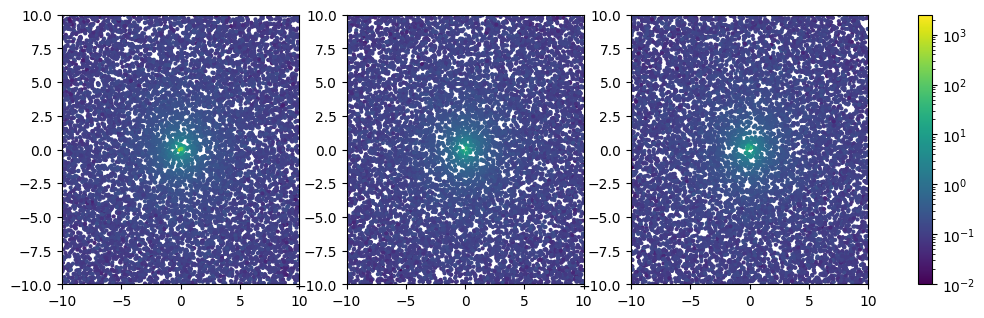

In [4]:
gm.quick_slice_plot(R, THETA, PHI, sphere_data, coords='sph', log_scale=True)

### Example: Power Law Torus

In [5]:
# norm, radial_index, polar_index, rmin, rmax, opening_angle
torus = gm.PowerLawTorus(1., 0., 0., 1, 10., 20.)

In [6]:
N = 10000000
R, THETA, PHI, torus_data = torus.sample(N, size=20.)
data_noise = gm.gaussian_noise(N, noise_amplitude=0.2)
torus_data += data_noise

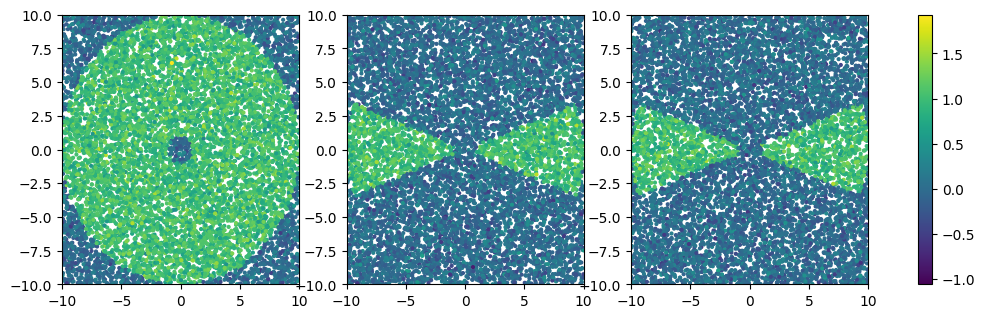

In [7]:
gm.quick_slice_plot(R, THETA, PHI, torus_data, coords='sph')

In [8]:
model_torus = gm.PowerLawTorusSmooth(None, None, None, None, None, None, 100., 100., norm_scheme='fixed_max')
model_torus.fit(torus_data, R, THETA)
print(model_torus.fitted_variables, model_torus.fitted_variable_errors, model_torus.fit_cond, sep='\n')

/Users/jaedenbardati/Documents/python/research/geometric-model/geometricmodel.py:360: RuntimeWarning: overflow encountered in exp
  _b = (1.0+np.exp(smooth_index*(xlo-x)/(xhi - xlo)))*(1.0+np.exp(smooth_index*(x-xhi)/(xhi - xlo)))


{'norm': 0.9526943954808522, 'radial_index': -0.02324350894251072, 'polar_index': -0.10997311588859737, 'rmin': 1.0448620380915428, 'rmax': 9.99669874972487, 'opening_angle': 19.97619493938783}
{'norm': 0.0009961167074418302, 'radial_index': 0.0005086905921907291, 'polar_index': 0.0016904062363771945, 'rmin': 0.0020700595349637274, 'rmax': 0.00021684145325595415, 'opening_angle': 0.0011421958719988606}
903.306864096797


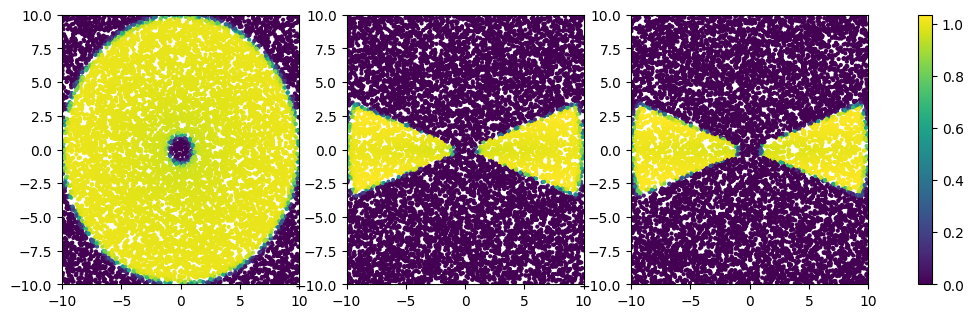

In [10]:
fitted_torus_data = model_torus(R, THETA)
gm.quick_slice_plot(R, THETA, PHI, fitted_torus_data, coords='sph')

$~$